<a href="https://colab.research.google.com/github/griascos/simulacion_manufactura/blob/main/Pruebas_de_bondad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math;
import numpy as np; 
import random as rd;
import pandas as pd;
import scipy.stats as st;
import matplotlib as plt; 

# **Prueba Ji-Cuadrado**

Definición de parámetros

In [ ]:
n = 1024;
m = math.sqrt(n);
long_int = 1/m;
datos = np.zeros(n);

In [ ]:
for i in range(n):
  datos[i] = rd.random();

Determinación de intervalos

In [ ]:
j = 0; 
intervalos = np.zeros(int(m+1));
for i in range(int(m+1)):
  if i < 1:
    intervalos[i] = 0;
  else:
    intervalos[i] = j + long_int;
    j = j + long_int;

In [ ]:
agrupacion = pd.cut(datos, bins = intervalos);
freq_o = agrupacion.value_counts();
estadistico = sum(pow(agrupacion.value_counts()-m,2)/m);



Prueba Chi Cuadrado

In [ ]:
valorp_chi2 = 1-st.chi2.cdf(estadistico,m-1);
valorp_chi2

0.4852182714892398

# **Prueba Kolmogorov**

In [ ]:
nk = 1000;
datosk = np.zeros(nk);

Generación números aleatorios

In [ ]:
for i in range(nk):
  datosk[i] = rd.random();

In [ ]:
datos_ordenados = np.sort(datosk);
i_vector = np.zeros(nk);
for i in range(nk):
  i_vector[i] = i + 1;

Cálculo de:

$$ \frac{i}{n} ~~;~~\frac{i}{n}-F(x_{i})~~;~~F(x_{i})-\frac{i-1}{n}$$ 



In [ ]:
in_vector = i_vector/nk;
a_vector = in_vector-datos_ordenados;
b_vector = datos_ordenados - (i_vector-1)/nk;

In [ ]:
x = np.mean(datos_ordenados);
s = np.std(datos_ordenados);
print("Media: ",x,"    Desv. Est: ", s);

Media:  0.49381659854283305     Desv. Est:  0.2913937318512876


Hallar máximos y mínimos para parámetros: $$D^{+}~~y~~D^{-} $$

In [ ]:
dplus = np.max(a_vector);
dminus = np.abs(np.min(b_vector));

0.023169955608120685 0.022169955608120684


In [ ]:
d_n = max(dplus,dminus);
d_n

0.023169955608120685

Contraste de hipótesis

In [ ]:
alpha = 0.05;
calpha = 1.36/math.sqrt(nk);

In [ ]:
if calpha < d_n: 
  print("Se rechaza la hipótesis nula y por ende se concluye que",
        "los números no siguen una dist. uniforme");
else:
  print("No se rechaza la hipótesis nula y se comprueba que efectivamente",
        "los números siguen la dist. uniforme");

No se rechaza la hipótesis nula y se comprueba que efectivamente los números siguen la dist. uniforme


# **Gráficas**

Prueba de póker

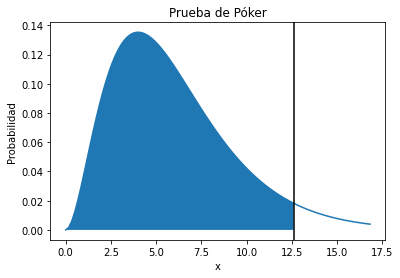

In [56]:
df = 6 # parametro de forma.
chi2 = st.chi2(df)
x = np.linspace(chi2.ppf(0),
                chi2.ppf(0.99), 100)
x1 = np.linspace(chi2.ppf(0),
                chi2.ppf(0.95), 100)
fp = chi2.pdf(x) # Función de Probabilidad
fp1 = chi2.pdf(x1)
plt.pyplot.plot(x, fp)
plt.pyplot.axvline(12.59, c = "black")
plt.pyplot.fill_between(x1, 0, fp1)
plt.pyplot.title('Prueba de Póker')
plt.pyplot.ylabel('Probabilidad')
plt.pyplot.xlabel('x')
plt.pyplot.show()

Prueba Ji-Cuadrado

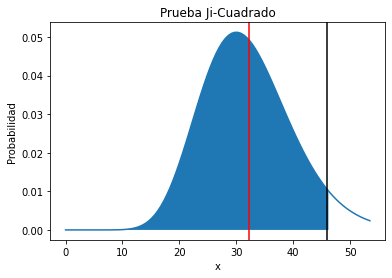

In [63]:
df = 32 # parametro de forma.
chi2 = st.chi2(df)
x = np.linspace(chi2.ppf(0),
                chi2.ppf(0.99), 100)
x1 = np.linspace(chi2.ppf(0),
                chi2.ppf(0.95), 100)
fp = chi2.pdf(x) # Función de Probabilidad
fp1 = chi2.pdf(x1)
plt.pyplot.plot(x, fp)
plt.pyplot.axvline(46, c = "black")
plt.pyplot.axvline(32.19, c = "red")
plt.pyplot.fill_between(x1, 0, fp1)
plt.pyplot.title('Prueba Ji-Cuadrado')
plt.pyplot.ylabel('Probabilidad')
plt.pyplot.xlabel('x')
plt.pyplot.show()

Pruebas por encima y debajo de la mieda

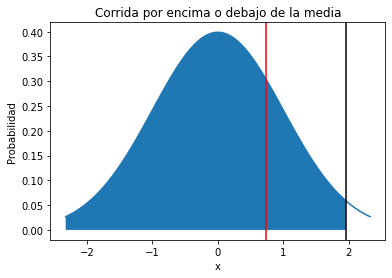

In [78]:
# Graficando Normal
mu, sigma = 0, 1 # media y desvio estandar
normal = st.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
x1 = np.linspace(normal.ppf(0.01),
                normal.ppf(0.975), 100)
fp = normal.pdf(x) # Función de Probabilidad
fp1 = normal.pdf(x1)
plt.pyplot.plot(x, fp)
plt.pyplot.axvline(1.96, c = "black")
plt.pyplot.axvline(0.74, c = "red")
plt.pyplot.fill_between(x1, 0, fp1)
plt.pyplot.title('Corrida por encima o debajo de la media')
plt.pyplot.ylabel('Probabilidad')
plt.pyplot.xlabel('x')
plt.pyplot.show()

Pruebas por corridas ascendentes y descendentes

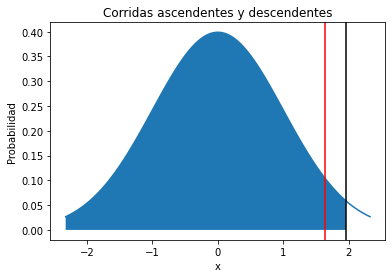

In [79]:
# Graficando Normal
mu, sigma = 0, 1 # media y desvio estandar
normal = st.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
x1 = np.linspace(normal.ppf(0.01),
                normal.ppf(0.975), 100)
fp = normal.pdf(x) # Función de Probabilidad
fp1 = normal.pdf(x1)
plt.pyplot.plot(x, fp)
plt.pyplot.axvline(1.96, c = "black")
plt.pyplot.axvline(1.64, c = "red")
plt.pyplot.fill_between(x1, 0, fp1)
plt.pyplot.title('Corridas ascendentes y descendentes')
plt.pyplot.ylabel('Probabilidad')
plt.pyplot.xlabel('x')
plt.pyplot.show()